In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
path = ".././data_4_ScienceHack2021/"
output_path = "./processed_data"
map_file_data = "./map_data"
trip = 'trip_' + str(12)


In [2]:
pass_data = pd.read_csv(path + trip + '/passenger_count_nums', sep=',', skiprows=[1])
enter_station = pass_data[pass_data["Number_of_Passengers"] == -10]["Epoch_Time"].to_numpy()
leave_station = pass_data[pass_data["Number_of_Passengers"] == -99]["Epoch_Time"].to_numpy()
pass_between_station = pass_data[(pass_data["Number_of_Passengers"] != -99) & (pass_data["Number_of_Passengers"] != -10)]["Number_of_Passengers"].to_numpy()


In [3]:
data = pd.read_csv(path + trip + '/wifi_data.csv', sep=';')
#data = data[(data["epoch_ts"] > float(leave_station[0]))]
reduced_data = data[['epoch_ts', 'mac_address', 'rssi']]
#data

In [4]:

s = 0
cnt = 0
for low, high, num in zip(enter_station, leave_station, pass_between_station):
    print(float(low))
    print(num)
    
    raspberry = reduced_data[(data["epoch_ts"] > float(low)) & (data["epoch_ts"] < float(high))]
    raspberry = raspberry[raspberry["mac_address"] == "b8:27:eb:6b:c4:60"]
    rssi = raspberry["rssi"].to_numpy()
    print(type(rssi))
    print(rssi)
    s += sum(rssi)
    cnt += len(rssi)
    print(raspberry)
    print(float(high))
    
#    b8:27:eb:6b:c4:60

print(s/cnt)

1618511900.81
11
<class 'numpy.ndarray'>
[-14 -14 -12 -14 -16 -10 -12 -16]
         epoch_ts        mac_address  rssi
254  1.618512e+09  b8:27:eb:6b:c4:60   -14
255  1.618512e+09  b8:27:eb:6b:c4:60   -14
256  1.618512e+09  b8:27:eb:6b:c4:60   -12
257  1.618512e+09  b8:27:eb:6b:c4:60   -14
258  1.618512e+09  b8:27:eb:6b:c4:60   -16
375  1.618512e+09  b8:27:eb:6b:c4:60   -10
376  1.618512e+09  b8:27:eb:6b:c4:60   -12
377  1.618512e+09  b8:27:eb:6b:c4:60   -16
1618512021.4
1618512035.6
12
<class 'numpy.ndarray'>
[-41 -12 -14 -10 -12 -12 -10  -8]
         epoch_ts        mac_address  rssi
448  1.618512e+09  b8:27:eb:6b:c4:60   -41
449  1.618512e+09  b8:27:eb:6b:c4:60   -12
450  1.618512e+09  b8:27:eb:6b:c4:60   -14
451  1.618512e+09  b8:27:eb:6b:c4:60   -10
452  1.618512e+09  b8:27:eb:6b:c4:60   -12
534  1.618512e+09  b8:27:eb:6b:c4:60   -12
535  1.618512e+09  b8:27:eb:6b:c4:60   -10
536  1.618512e+09  b8:27:eb:6b:c4:60    -8
1618512102.47
1618512119.46
10
<class 'numpy.ndarray'>
[-39 -41 

1618511900.81
11


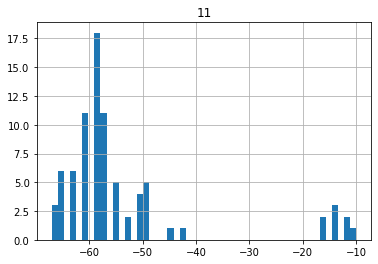

1618512021.4
1618512035.6
12


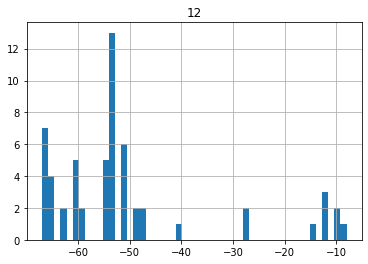

1618512102.47
1618512119.46
10


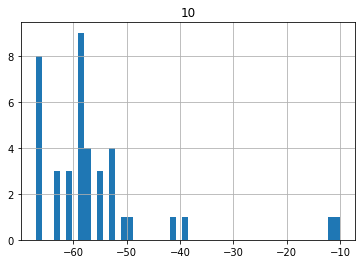

1618512189.01
1618512200.06
9


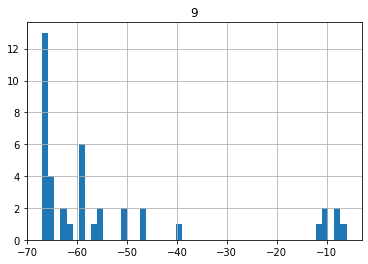

1618512266.85
1618512287.2
8


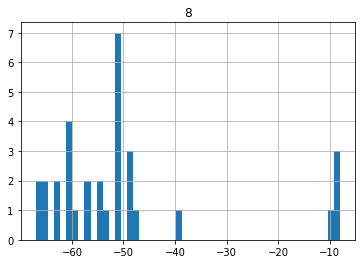

1618512349.27
1618512366.81
15


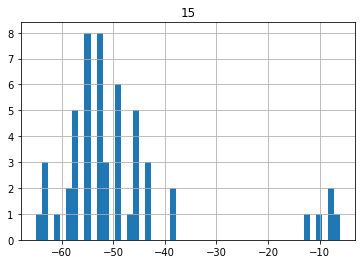

1618512406.97
1618512422.25
15


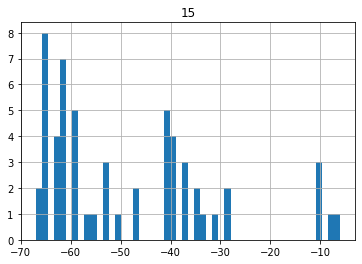

1618512503.97
1618512514.25
16


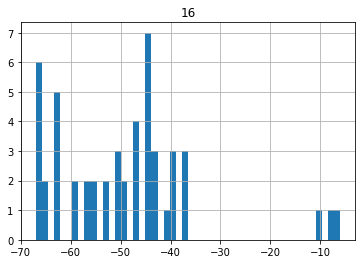

1618512575.39
1618512586.94
17


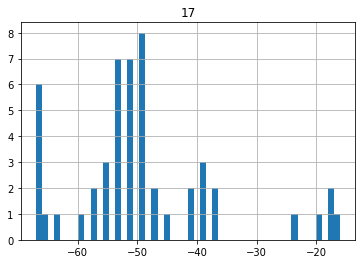

1618512682.44
1618512698.72
14


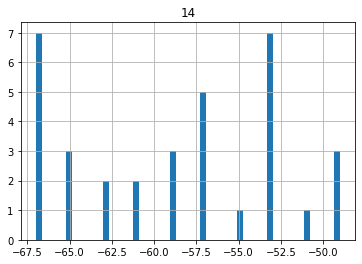

1618512746.31
1618512759.13
12


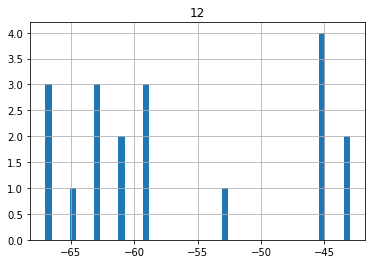

1618512791.64
1618512803.17
11


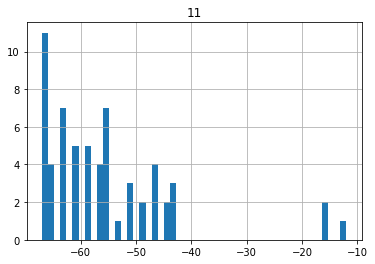

1618512859.31
1618512944.19
12


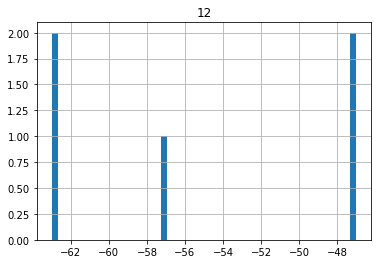

1618512966.76
1618513034.96
10


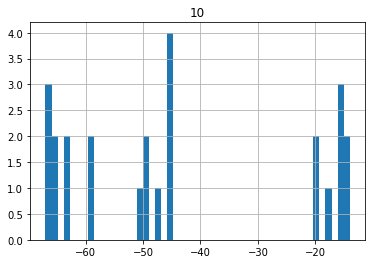

1618513119.71
1618513133.41
10


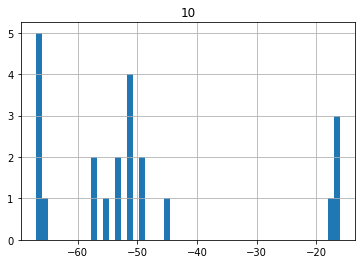

1618513181.0
1618513190.2
8


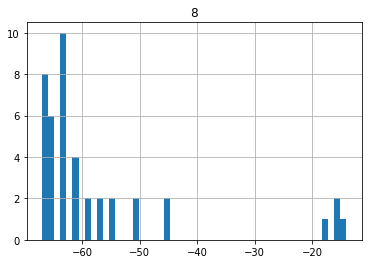

1618513258.42
1618513268.17
7


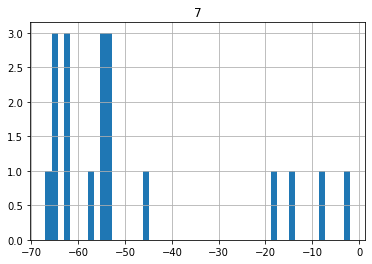

1618513299.05


In [5]:
rssi_raspberry = -23.182
input_file = open(output_path + "/in_" + trip + ".txt","w")
output_file = open(output_path + "/out_" + trip + ".txt","w")
num_bins = 50
N = 3
for low, high, num in zip(enter_station, leave_station, pass_between_station):
    print(float(low))
    print(num)
    stop_to_stop = reduced_data[(data["epoch_ts"] > float(low)) & (data["epoch_ts"] < float(high))]
    
#    plt.figure()
#    plt.title(num)
#    stop_to_stop["epoch_ts"].hist(bins = num_bins)
    """
    ax = plt.gca() # get axis handle
    p = ax.patches
    heights = [patch.get_height() for patch in p]    #print(p)
    for i in range(len(heights) - 1):
        input_file.write(str(heights[i]) + ",")
    input_file.write(str(heights[-1]) + "\n")
    output_file.write(str(num) + "\n")
    """
    radius_stop = stop_to_stop[(10**((rssi_raspberry - stop_to_stop["rssi"].to_numpy()) / 10 / N)) < 30 ]
    plt.figure()
    plt.title(num)
    radius_stop["rssi"].hist(bins = num_bins)
    ax = plt.gca() # get axis handle
    p = ax.patches
    heights = [patch.get_height() for patch in p]
#    np.savetxt("ff.txt", heights)
    for i in range(len(heights) - 1):
        input_file.write(str(heights[i]) + " ")
    input_file.write(str(heights[-1]) + "\n")
    if num <= 10:
        output_file.write(str(0) + "\n")
    elif num <=20:
        output_file.write(str(1) + "\n")
    elif num <= 30:
        output_file.write(str(2) + "\n")
    elif num <= 40:
        output_file.write(str(3) + "\n")
    elif num <= 50:
        output_file.write(str(4) + "\n")
    else:
        output_file.write(str(5) + "\n")

    plt.show()
    """
    distance_raspberry = 10**((rssi_raspberry - stop_to_stop["rssi"].to_numpy()) / 10 / N)
    plt.title(num)
    plt.hist(distance_raspberry, bins = num_bins)
    plt.show()
    """
#    plt.show()
#    plt.figure()
#    stop_to_stop["rssi"].hist(bins = num_bins)
#    plt.show()
    print(float(high))
    
input_file.close()
output_file.close()

In [6]:
pass_data = pd.read_csv(path + trip + '/passenger_count_nums', sep=',', skiprows=[1])
enter_station = pass_data[pass_data["Number_of_Passengers"] == -10]["Epoch_Time"].to_numpy()
leave_station = pass_data[pass_data["Number_of_Passengers"] == -99]["Epoch_Time"].to_numpy()
pass_between_station = pass_data[(pass_data["Number_of_Passengers"] != -99) & (pass_data["Number_of_Passengers"] != -10)]["Number_of_Passengers"].to_numpy()

#print(len(enter_station), len(leave_station), len(pass_between_station))

num_pass = []

gps_data = pd.read_csv(path + trip + '/gps_data.csv', sep=',', skiprows = [1])

for ep in gps_data['epoch_ts'].to_numpy():
##    print(enter_station)\n",
#    print(ep)\n",
    for i in range(len(enter_station)):
        if leave_station[i - 1] <= ep and ep <= enter_station[i]:
            num_pass.append(pass_between_station[i - 1])
        if enter_station[i] <= ep and ep <= leave_station[i]:
            num_pass.append(pass_between_station[i])
            break;
print(len(num_pass))
f_out = open(map_file_data + "/pass_bus_out_" + trip + ".csv","w")
for i in range(len(num_pass)):
    f_out.write(str(num_pass[i]) + ",")
f_out.close()

lati_out = open(map_file_data + "/latitude_bus_out_" + trip + ".csv","w")
for lati in gps_data["latitude"].to_numpy():
    lati_out.write(str(lati) + ",")
lati_out.close()    

long_out = open(map_file_data + "/longitude_bus_out_" + trip + ".csv","w")
for long in gps_data["longitude"].to_numpy():
    long_out.write(str(long) + ",")
long_out.close()    

#np.savetxt(map_file_data + "/latitude_bus_out_" + trip + ".csv", gps_data["latitude"].to_numpy(), delimiter=",")
#np.savetxt(map_file_data + "/longitude_bus_out_" + trip + ".csv", gps_data["longitude"].to_numpy(), delimiter=",")



1399
